In [ ]:
import random as r
import matplotlib.pyplot as plt

Quasi-Monte Carlo

Quasi-Monte Carlo has a rate of convergence close to O(1/N), whereas the rate for the Monte Carlo method is O(N^{−0.5}) - [wikipdia](https://en.wikipedia.org/wiki/Quasi-Monte_Carlo_method)

Halton’s low discrepency sequences -Monte Carlo sampling methods - [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html)

In [ ]:
import numpy 
import math

In [ ]:
# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


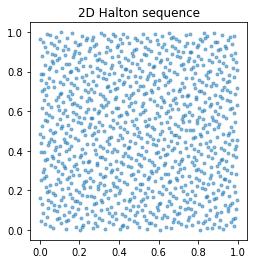

In [ ]:
N = 1000
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);


Pi approx: 3.1448


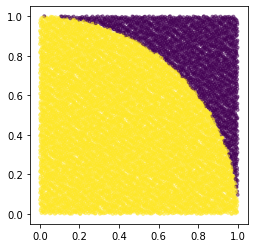

In [ ]:
N = 10000
seq = halton(2, N)
count = 0
c=[]
for p in seq:
  if (p[0]**2+p[1]**2 < 1):
    count = count +1
    c.append(1)
  else:
    c.append(0)
print("Pi approx:",4*count/float(N))
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1],  c=c,marker=".", alpha=0.5);


In [ ]:
N = 1000000
seq = halton(2, N)
count = 0
for p in seq:
  if (p[0]**2+p[1]**2 < 1):
    count = count +1
    c.append(1)
  else:
    c.append(0)
print("Pi approx:",4*count/float(N))

Pi approx: 3.141572


# **Monte Carlo Blackjack**

## **1.Estimando la probabilidad de obtener BlackJack 21 y el promedio de cartas necesarias, para una baraja de Poker y para una baraja Española.**

In [3]:
# Imoprtando librerías necesarias y 
# definiendo una función para evaluar los dos posibles valores del AS en este juego
import random
from random import choice

def carta_As():
  As = [1,11]
  k = choice(As)
  return k
  

### *Estimando probabilidad para 2 cartas.*

In [4]:
# Probabilidad para dos cartas

#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]
a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = choice(valores)
  m = choice(valores)
  n1 = choice(valoresE)
  m1 = choice(valoresE)
  if (n + m) == 21:
    a = a + 1 
  else:
    b = b + 1
  if (n1 + m1) == 21:
    a1 = a1 + 1 
  else:
    b1 = b1 + 1

prob_2_cards = (a/t)
prob_2_cardsE = (a1/t)
    
print("Casos favorables:",a,"/Casos totales:",t,"; La probabilidad de obtener 21 en 2 cartas en la baraja de poker es aproximadamente:",prob_2_cards , " o ", prob_2_cards*100 , "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; La probabilidad de obtener 21 en 2 cartas en la baraja Española es aproximadamente:",prob_2_cardsE , " o ", prob_2_cardsE*100 , "%")
print("Casos NO favorables:",b1)

Casos favorables: 408920 /Casos totales: 10000000 ; La probabilidad de obtener 21 en 2 cartas en la baraja de poker es aproximadamente: 0.040892  o  4.0892 %
Casos NO favorables: 9591080

Casos favorables: 278776 /Casos totales: 10000000 ; La probabilidad de obtener 21 en 2 cartas en la baraja Española es aproximadamente: 0.0278776  o  2.78776 %
Casos NO favorables: 9721224


### *Estimando probabilidad para 3 cartas.*

In [5]:
# Probabilidad para tres cartas

#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]
a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = choice(valores)
  m = choice(valores)
  o = choice(valores)
  n1 = choice(valoresE)
  m1 = choice(valoresE)
  o1 = choice(valoresE)
  if (n + m + o) == 21:
    a = a + 1   
  else:
    b = b + 1
  if (n1 + m1 + o1) == 21:
    a1 = a1 + 1 
  else:
    b1 = b1 + 1
    
prob_3_cards = (a/t)
prob_3_cardsE = (a1/t)
    
print("Casos favorables:",a,"/Casos totales:",t,"; La probabilidad de obtener 21 en 3 cartas en la baraja de poker es aproximadamente:",prob_3_cards , " o ", prob_3_cards*100 , "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; La probabilidad de obtener 21 en 3 cartas en la baraja Española es aproximadamente:",prob_3_cardsE , " o ", prob_3_cardsE*100 , "%")
print("Casos NO favorables:",b1)

Casos favorables: 726885 /Casos totales: 10000000 ; La probabilidad de obtener 21 en 3 cartas en la baraja de poker es aproximadamente: 0.0726885  o  7.2688500000000005 %
Casos NO favorables: 9273115

Casos favorables: 613209 /Casos totales: 10000000 ; La probabilidad de obtener 21 en 3 cartas en la baraja Española es aproximadamente: 0.0613209  o  6.13209 %
Casos NO favorables: 9386791


### *Estimando probabilidad para 4 cartas.*

In [7]:
# Probabilidad para cuatro cartas

#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         1,11,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = choice(valores)
  m = choice(valores)
  o = choice(valores)
  p = choice(valores)
  n1 = choice(valoresE)
  m1 = choice(valoresE)
  o1 = choice(valoresE)
  p1 = choice(valoresE)
  if (n + m + o + p) == 21:
    a = a + 1   
  else:
    b = b + 1
  if (n1 + m1 + o1 + p1) == 21:
    a1 = a1 + 1 
  else:
    b1 = b1 + 1

prob_4_cards = (a/t)
prob_4_cardsE = (a1/t)
    
print("Casos favorables:",a,"/Casos totales:",t,"; La probabilidad de obtener 21 en 4 cartas en la baraja de poker es aproximadamente:",prob_4_cards , " o ", prob_4_cards*100, "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; La probabilidad de obtener 21 en 2 cartas en la baraja Española es aproximadamente:",prob_4_cardsE , " o ", prob_4_cardsE*100 , "%")
print("Casos NO favorables:",b1)

Casos favorables: 348946 /Casos totales: 10000000 ; La probabilidad de obtener 21 en 4 cartas en la baraja de poker es aproximadamente: 0.0348946  o  3.48946 %
Casos NO favorables: 9651054

Casos favorables: 441066 /Casos totales: 10000000 ; La probabilidad de obtener 21 en 2 cartas en la baraja Española es aproximadamente: 0.0441066  o  4.41066 %
Casos NO favorables: 9558934


### *Estimando probabilidad para 5 cartas.*

In [8]:
# Probabilidad para cinco cartas

#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = random.sample(valores,5)
  m = random.sample(valoresE,5)
  for j in range(0,len(n)):
    if (n[j]==0):
      n[j]=carta_As()
  s1=sum(m)    
  s = sum(n)
  if (s==21):
    a+=1
  else:
    b+=1
  if (s1==21):
    a1+=1
  else:
    b1+=1

prob_5_cards = (a/t)
prob_5_cardsE = (a1/t)
print("Casos favorables:",a,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 5 cartas en la baraja de poker es aproximadamente:",prob_5_cards , " o ", prob_5_cards*100, "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 2 cartas en la baraja Española es aproximadamente:",prob_5_cardsE , " o ", prob_5_cardsE*100 , "%")
print("Casos NO favorables:",b1)  

Casos favorables: 82631 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 5 cartas en la baraja de poker es aproximadamente: 0.0082631  o  0.8263100000000001 %
Casos NO favorables: 9917369

Casos favorables: 171385 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 2 cartas en la baraja Española es aproximadamente: 0.0171385  o  1.71385 %
Casos NO favorables: 9828615


### *Estimando probabilidad para 6 cartas.*

In [9]:
# Probabilidad para seis cartas

#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = random.sample(valores,6)
  m = random.sample(valoresE,6)
  for j in range(0,len(n)):
    if (n[j]==0):
      n[j]=carta_As()
  s1=sum(m)    
  s = sum(n)
  if (s==21):
    a+=1
  else:
    b+=1
  if (s1==21):
    a1+=1
  else:
    b1+=1

prob_6_cards = (a/t)
prob_6_cardsE = (a1/t)
print("Casos favorables:",a,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 6 cartas en la baraja de poker es aproximadamente:",prob_6_cards , " o ", prob_6_cards*100, "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 6 cartas en la baraja Española es aproximadamente:",prob_6_cardsE , " o ", prob_6_cardsE*100 , "%")
print("Casos NO favorables:",b1)  

Casos favorables: 11522 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 6 cartas en la baraja de poker es aproximadamente: 0.0011522  o  0.11521999999999999 %
Casos NO favorables: 9988478

Casos favorables: 40388 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 6 cartas en la baraja Española es aproximadamente: 0.0040388  o  0.40388 %
Casos NO favorables: 9959612


### *Estimando probabilidad para 7 cartas.*

In [11]:
# Probabilidad para siete cartas

#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = random.sample(valores,7)
  m = random.sample(valoresE,7)
  for j in range(0,len(n)):
    if (n[j]==0):
      n[j]=carta_As()
  s1=sum(m)    
  s = sum(n)
  if (s==21):
    a+=1
  else:
    b+=1
  if (s1==21):
    a1+=1
  else:
    b1+=1

prob_7_cards = (a/t)
prob_7_cardsE = (a1/t)
print("Casos favorables:",a,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 7 cartas en la baraja de poker es aproximadamente:",prob_7_cards , " o ", prob_7_cards*100, "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 7 cartas en la baraja Española es aproximadamente:",prob_7_cardsE , " o ", prob_7_cardsE*100 , "%")
print("Casos NO favorables:",b1)  

Casos favorables: 1025 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 7 cartas en la baraja de poker es aproximadamente: 0.0001025  o  0.01025 %
Casos NO favorables: 9998975

Casos favorables: 6056 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 7 cartas en la baraja Española es aproximadamente: 0.0006056  o  0.060559999999999996 %
Casos NO favorables: 9993944


### *Estimando probabilidad para 8 cartas.*

In [13]:
# Probabilidad para ocho cartas
#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = random.sample(valores,8)
  m = random.sample(valoresE,8)
  for j in range(0,len(n)):
    if (n[j]==0):
      n[j]=carta_As()
  s1=sum(m)    
  s = sum(n)
  if (s==21):
    a+=1
  else:
    b+=1
  if (s1==21):
    a1+=1
  else:
    b1+=1

prob_8_cards = (a/t)
prob_8_cardsE = (a1/t)
print("Casos favorables:",a,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 8 cartas en la baraja de poker es aproximadamente:",prob_8_cards , " o ", prob_8_cards*100, "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 8 cartas en la baraja Española es aproximadamente:",prob_8_cardsE , " o ", prob_8_cardsE*100 , "%")
print("Casos NO favorables:",b1)  

Casos favorables: 47 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 8 cartas en la baraja de poker es aproximadamente: 4.7e-06  o  0.00047 %
Casos NO favorables: 9999953

Casos favorables: 533 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 8 cartas en la baraja Española es aproximadamente: 5.33e-05  o  0.0053300000000000005 %
Casos NO favorables: 9999467


### *Estimando probabilidad para 9 cartas.*

In [18]:
# Probabilidad para 9 cartas
#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = random.sample(valores,9)
  m = random.sample(valoresE,9)
  for j in range(0,len(n)):
    if (n[j]==0):
      n[j]=carta_As()
  s1=sum(m)    
  s = sum(n)
  if (s==21):
    a+=1
  else:
    b+=1
  if (s1==21):
    a1+=1
  else:
    b1+=1

prob_9_cards = (a/t)
prob_9_cardsE = (a1/t)
print("Casos favorables:",a,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 9 cartas en la baraja de poker es aproximadamente:",prob_9_cards , " o ", prob_9_cards*100, "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 9 cartas en la baraja Española es aproximadamente:",prob_9_cardsE , " o ", prob_9_cardsE*100 , "%")
print("Casos NO favorables:",b1)  

Casos favorables: 4 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 9 cartas en la baraja de poker es aproximadamente: 4e-07  o  3.9999999999999996e-05 %
Casos NO favorables: 9999996

Casos favorables: 37 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 9 cartas en la baraja Española es aproximadamente: 3.7e-06  o  0.00037 %
Casos NO favorables: 9999963


### *Estimando probabilidad para 10 cartas.*

In [20]:
# Probabilidad para 10 cartas
#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = random.sample(valores,10)
  m = random.sample(valoresE,10)
  for j in range(0,len(n)):
    if (n[j]==0):
      n[j]=carta_As()
  s1=sum(m)    
  s = sum(n)
  if (s==21):
    a+=1
  else:
    b+=1
  if (s1==21):
    a1+=1
  else:
    b1+=1

prob_10_cards = (a/t)
prob_10_cardsE = (a1/t)
print("Casos favorables:",a,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 10 cartas en la baraja de poker es aproximadamente:",prob_10_cards , " o ", prob_10_cards*100, "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 10 cartas en la baraja Española es aproximadamente:",prob_10_cardsE , " o ", prob_10_cardsE*100 , "%")
print("Casos NO favorables:",b1)  

Casos favorables: 0 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 10 cartas en la baraja de poker es aproximadamente: 0.0  o  0.0 %
Casos NO favorables: 10000000

Casos favorables: 0 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 10 cartas en la baraja Española es aproximadamente: 0.0  o  0.0 %
Casos NO favorables: 10000000


### *Estimando probabilidad para 11 cartas.*

In [22]:
# Probabilidad para 11 cartas
#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valores=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
         0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for i in range(0,t):
  n = random.sample(valores,11)
  m = random.sample(valoresE,11)
  for j in range(0,len(n)):
    if (n[j]==0):
      n[j]=carta_As()
  s1=sum(m)    
  s = sum(n)
  if (s==21):
    a+=1
  else:
    b+=1
  if (s1==21):
    a1+=1
  else:
    b1+=1

prob_11_cards = (a/t)
prob_11_cardsE = (a1/t)
print("Casos favorables:",a,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 11 cartas en la baraja de poker es aproximadamente:",prob_11_cards , " o ", prob_11_cards*100, "%")
print("Casos NO favorables:",b)
print("\nCasos favorables:",a1,"/Casos totales:",t,"; \nLa probabilidad de obtener 21 en 11 cartas en la baraja Española es aproximadamente:",prob_11_cardsE , " o ", prob_11_cardsE*100 , "%")
print("Casos NO favorables:",b1)  

Casos favorables: 0 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 11 cartas en la baraja de poker es aproximadamente: 0.0  o  0.0 %
Casos NO favorables: 10000000

Casos favorables: 0 /Casos totales: 10000000 ; 
La probabilidad de obtener 21 en 11 cartas en la baraja Española es aproximadamente: 0.0  o  0.0 %
Casos NO favorables: 10000000


## **Trazando distribución experimental**

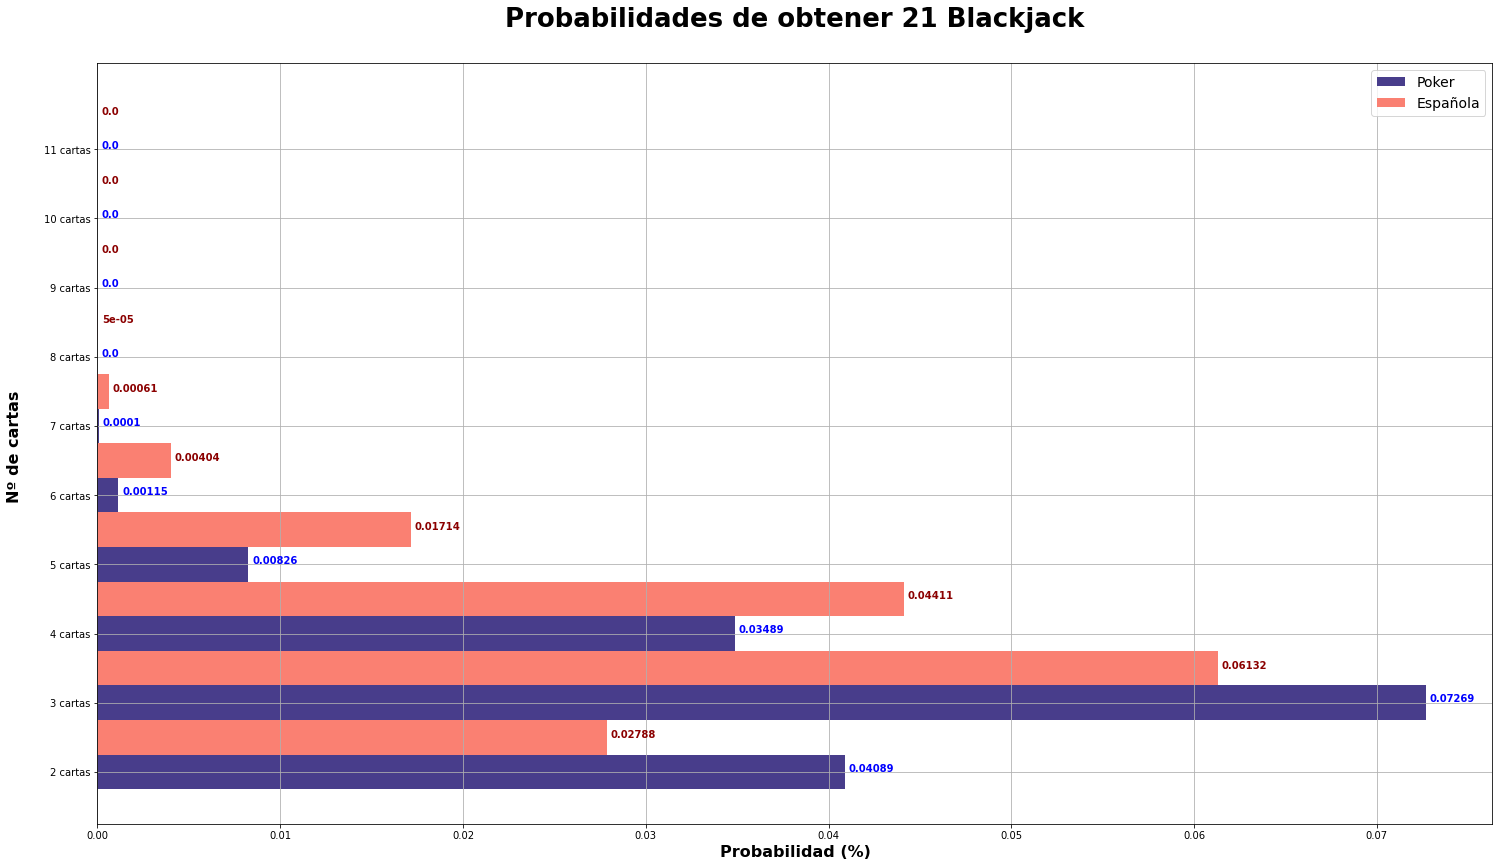

In [23]:
# Importando librerías necesarias para graficar

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

li = []
liE = []
barwidth = 0.5
# Creamos un arreglo para las etiquetas en y
va = ["2 cartas","3 cartas","4 cartas","5 cartas","6 cartas","7 cartas", "8 cartas","9 cartas","10 cartas","11 cartas"]
# Guardamos en un arreglo las probabilidades obtenidas
probabilidades = [prob_2_cards, prob_3_cards, prob_4_cards, prob_5_cards, prob_6_cards, prob_7_cards, prob_8_cards,prob_9_cards,prob_10_cards,prob_11_cards]
# Limito los decimales a 4 dígitos 
for i in probabilidades:
  x = (round(i, 5))
  li.append(x)
# Española
probabilidadesE = [prob_2_cardsE, prob_3_cardsE, prob_4_cardsE, prob_5_cardsE, prob_6_cardsE, prob_7_cardsE, prob_8_cardsE,prob_9_cardsE,prob_10_cardsE,prob_11_cardsE]
for i in probabilidadesE:
  x1 = (round(i, 5))
  liE.append(x1)
# Obtenemos una lista con las posiciones de cada carta
y_pos = np.arange(len(probabilidades))
y_posE = [x + .5 for x in y_pos]

plt.figure(figsize = (25,14))
# Creamos la grafica pasando los valores en el eje X, Y, donde X = probabilidad y Y = nº de cartas
poker = plt.barh(y_pos, li, height = 0.5, align='center', color = 'darkslateblue', label = "Poker")
espanola = plt.barh(y_posE, liE, height = 0.5, align='center', color = 'salmon', label = "Española")
# Añadimos las etiquetas de nombres
plt.yticks(y_pos, va)
# Aññadimos anotaciones a las barras
for i, v in enumerate(li):
  plt.text(v + .0002, i + .01, str(v), color='blue', fontweight='bold')
for j, w in enumerate(liE):
  plt.text(w + .0002, j + .5, str(w), color='darkred', fontweight='bold')
# Etiquetas ejes
plt.xlabel('Probabilidad (%)', fontsize = 16, fontweight ='bold')
plt.ylabel('Nº de cartas \n', fontsize = 16, fontweight ='bold')
plt.legend(fontsize = 14)
plt.grid(True)
# Y una etiqueta superior
plt.title('Probabilidades de obtener 21 Blackjack\n', fontsize = 26, fontweight ='bold')
plt.show()

## **Estimando la probabilidad de obtener BlackJack 21 y el promedio de cartas necesarias, para una baraja de Poker y para una baraja Española.**

> *Probabilidad para una mano = [7,7,5] y quedan n/2 en el mazo restante de obtener 21 Blackjack.*

> *Para este caso solo se necesitan máximo dos cartas, pues al obtener dos cartas con valor 1, se completa el 21, o al obtener solo una carta con valor 2, se obtiene el 21. Para más de tres cartas siempre sobrepasaría el 21.*

In [ ]:
# Probabilidad para mano = [7,7,5] y quedan n/2 en el mazo restante pidiendo 1 carta

#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valor=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]
#------------------BARAJA EN MANO--------------
mano = [7,7,5]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for l in mano:
  # Se suma la lista "mano"
  s = sum(mano)
#print(s)

# Simulaciones
for i in range (0, t):
  # Selecciona una carta de n/2 cartas del mazo restante "Poker"
  c = valor[random.randrange(0, 27)]
  c1 = carta_As(c)
  #print(c1)
  # Selecciona una carta de n/2 cartas del mazo restante "Española"
  cE = valoresE[random.randrange(0, 25)]
  #print(cE)
  if (s + c1) == 21:
    a = a + 1
    #print("c1=", s, c1, s+c1, end= "\n")
  else:
    b = b + 1 
  if (s + cE) == 21:
    a1 = a1 + 1
    #print("cE=", s, cE, s+cE, end= "\n")
  else:
    b1 = b1 + 1

prob_mano1 = (a/t)
prob_manoE1 = (a1/t)

print("Casos favorables:",a,"/Casos totales:",t,"; La probabilidad de obtener 21 con una mano de [7,7,5] y media baraja de Poker restante es aproximadamente:",prob_mano1 , " o ", prob_mano1*100, "%")
print("Casos favorables:",a1,"/Casos totales:",t,"; La probabilidad de obtener 21 con una mano de [7,7,5] y media baraja Española restante es aproximadamente:",prob_manoE1, " o ", prob_manoE1*100, "%")

Casos favorables: 740978 /Casos totales: 10000000 ; La probabilidad de obtener 21 con una mano de [7,7,5] y media baraja de Poker restante es aproximadamente: 0.0740978  o  7.4097800000000005 %
Casos favorables: 799544 /Casos totales: 10000000 ; La probabilidad de obtener 21 con una mano de [7,7,5] y media baraja Española restante es aproximadamente: 0.0799544  o  7.995439999999999 %


In [ ]:
# Probabilidad para mano = [7,7,5] y quedan n/2 en el mazo restante pidiendo 2 cartas


#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valor=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]
#------------------BARAJA EN MANO--------------
mano = [7,7,5]

a = 0
b = 0
a1 = 0
b1 = 0
t = 10000000

for l in mano:
  # Se suma la lista "mano"
  s = sum(mano)
#print(s)

# Simulaciones
for i in range (0, t):
  # Selecciona una carta de n/2 cartas del mazo restante "Poker"
  c = valor[random.randrange(0, 27)]
  c1 = carta_As(c)
  c2 = valor[random.randrange(0, 27)]
  c3 = carta_As(c2)
  #print(c1)
  # Selecciona una carta de n/2 cartas del mazo restante "Española"
  cE = valoresE[random.randrange(0, 25)]
  cE2 = valoresE[random.randrange(0, 25)]
  #print(cE)
  if (s + c1 + c3) == 21:
    a = a + 1
    #print("c1=", s, c1, s+c1, end= "\n")
  else:
    b = b + 1 
  if (s + cE + cE2) == 21:
    a1 = a1 + 1
    #print("cE=", s, cE, s+cE, end= "\n")
  else:
    b1 = b1 + 1

prob_mano2 = (a/t)
prob_manoE2 = (a1/t)

print("Casos favorables:",a,"/Casos totales:",t,"; La probabilidad de obtener 21 con una mano de [7,7,5] y media baraja de Poker restante es aproximadamente:",prob_mano2 , " o ", prob_mano2*100, "%")
print("Casos favorables:",a1,"/Casos totales:",t,"; La probabilidad de obtener 21 con una mano de [7,7,5] y media baraja Española restante es aproximadamente:",prob_mano2 , " o ", prob_manoE2*100, "%")

Casos favorables: 30995 /Casos totales: 10000000 ; La probabilidad de obtener 21 con una mano de [7,7,5] y media baraja de Poker restante es aproximadamente: 0.0030995  o  0.30995 %
Casos favorables: 144263 /Casos totales: 10000000 ; La probabilidad de obtener 21 con una mano de [7,7,5] y media baraja Española restante es aproximadamente: 0.0030995  o  1.4426299999999999 %


## **Trazando distribución experimental**

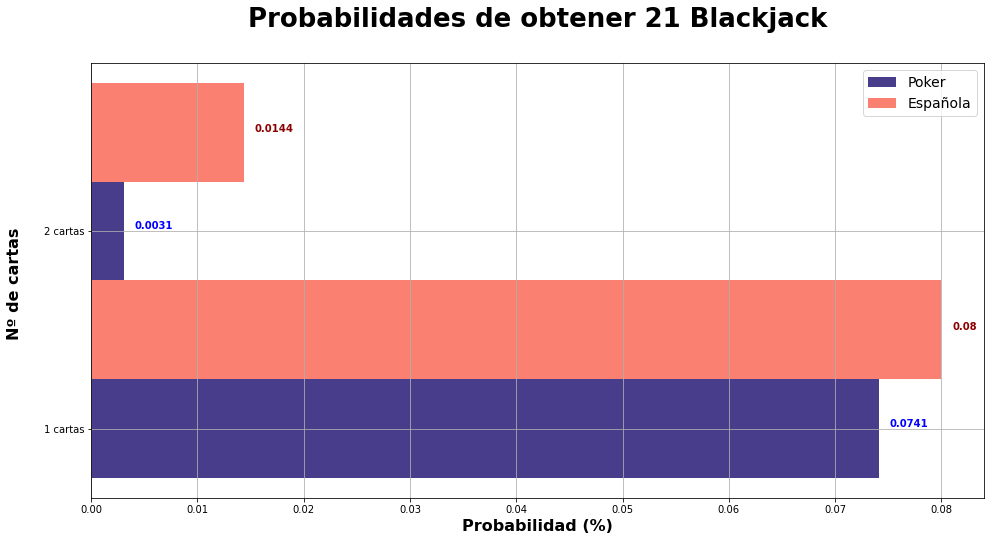

In [ ]:
# Importando librerías necesarias para graficar

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

li = []
liE = []
barwidth = 0.5
# Creamos un arreglo para las etiquetas en y
va = ["1 cartas","2 cartas"]
# Guardamos en un arreglo las probabilidades obtenidas
probabilidades = [prob_mano1, prob_mano2]
# Limito los decimales a 4 dígitos 
for i in probabilidades:
  x = (round(i, 4))
  li.append(x)
# Española
probabilidadesE = [prob_manoE1, prob_manoE2]
for i in probabilidadesE:
  x1 = (round(i, 4))
  liE.append(x1)
# Obtenemos una lista con las posiciones de cada carta
y_pos = np.arange(len(probabilidades))
y_posE = [x + .5 for x in y_pos]

plt.figure(figsize = (16,8))
# Creamos la grafica pasando los valores en el eje X, Y, donde X = probabilidad y Y = nº de cartas
poker = plt.barh(y_pos, li, height = 0.5, align='center', color = 'darkslateblue', label = "Poker")
espanola = plt.barh(y_posE, liE, height = 0.5, align='center', color = 'salmon', label = "Española")
# Añadimos las etiquetas de nombres
plt.yticks(y_pos, va)
# Aññadimos anotaciones a las barras
for i, v in enumerate(li):
  plt.text(v + .001, i + .01, str(v), color='blue', fontweight='bold')
for j, w in enumerate(liE):
  plt.text(w + .001, j + .5, str(w), color='darkred', fontweight='bold')
# Etiquetas ejes
plt.xlabel('Probabilidad (%)', fontsize = 16, fontweight ='bold')
plt.ylabel('Nº de cartas \n', fontsize = 16, fontweight ='bold')
plt.legend(fontsize = 14)
plt.grid(True)
# Y una etiqueta superior
plt.title('Probabilidades de obtener 21 Blackjack\n', fontsize = 26, fontweight ='bold')
plt.show()

## **Estimando la probabilidad de obtener BlackJack 21 quedando en el mazo una baraja caliente o una baraja fría, para una baraja de Poker y para una baraja Española.**

> **Baraja caliente:** *4 cartas de 1 y 4 cartas de 2.*

> *En este caso, tanto la baraja de Poker como la Española tendrán la misma probabilidad de hacer 21 Blackjack.*

> **Baraja fría:** *Una baraja sin 1's ni 2's.*

> *En este caso, las posibilidades son nulas, pues se necesita de por lo menos un 2 o un par de 1's para hacer 21 Blackjack.*



In [71]:
# Probabilidad para mano = [7,7,5] y queda en el mazo restante una baraja caliente y otra fría solo pidiendo una carta

#------------------BARAJA POKER------------------
cartas=["As",1,2,3,4,5,6,7,8,9,10,"J","Q","K"]
valor=[0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10, 
       0,2,3,4,5,6,7,8,9,10 ,10 ,10,10]
#------------------BARAJA ESPAÑOLA---------------
valoresE=[1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12, 
          1,2,3,4,5,6,7,8,9,10,11,12]
#------------------BARAJA EN MANO---------------
mano = [7,7,5]
#--------BARAJA CALIENTE AMBAS BARAJAS----------
# 4 cartas de 1 y 4 cartas de 2
hot_deck=[1,1,1,1,2,2,2,2]
#------------BARAJA FRÍA POKER------------------
cold_deck=[11,3,4,5,6,7,8,9,10,10,10,10, 
           11,3,4,5,6,7,8,9,10,10,10,10, 
           11,3,4,5,6,7,8,9,10,10,10,10, 
           11,3,4,5,6,7,8,9,10,10,10,10]
#------------BARAJA FRÍA ESPAÑOLA---------------
cold_deckE=[3,4,5,6,7,8,9,10,11,12, 
            3,4,5,6,7,8,9,10,11,12, 
            3,4,5,6,7,8,9,10,11,12, 
            3,4,5,6,7,8,9,10,11,12]


a1 = 0
b1 = 0
a2 = 0
b2 = 0
a3 = 0
b3 = 0
t = 10000000

for l in mano:
  # Se suma la lista "mano"
  s = sum(mano)
#print(s)


for i in range (0, int(t/2)):
  # Selecciona una carta de baraja caliente 
  #n1 = hot_deck[random.randrange(0, 8)]
  n1 = choice(hot_deck)
  # Selecciona una carta de baraja fría del mazo restante "Poker"
  #n2 = cold_deck[random.randrange(0, 48)]
  n2 = choice(cold_deck)
  # Selecciona una carta de baraja fría del mazo restante "Española"
  #n3 = cold_deckE[random.randrange(0, 40)]
  n3 = choice(cold_deckE)
  
  # Simulaciones

  ## Baraja caliente
  if (s + n1) == 21:
    a1 = a1 + 1
      
  else:
    b1 = b1 + 1  
  ## Baraja fría Poker
  if (s + n2) == 21:
    a2 = a2 + 1
  else:
    b2 = b2 + 1


  ## Baraja fría Española   
  if (s + n3) == 21:
    a3 = a3 + 1
    #print(n3, mno, n3+mno,"sioooo")  
  else:
    b3 = b3 + 1
casF2=0
hot_deck2=[1,1,1,2,2,2,2]
for ax in range(0,t):
  qw=random.sample(hot_deck2,1)[0]
  if (qw+20==21):
    casF2+=1

prob_hot = (a1/(t/2))
prot_hotC2=(casF2/(2*t))
prob_cold = (a2/t)
prob_coldE = (a3/t)


print("La probabilidad de obtener 21 con una mano de [7,7,5] y una baraja caliente es aproximadamente:",prob_hot+prot_hotC2 , " o ", (prob_hot+prot_hotC2)*100, "%")
print("La probabilidad de obtener 21 con una mano de [7,7,5] y una baraja caliente Española es aproximadamente:",prob_hot+prot_hotC2 , " o ", (prob_hot+prot_hotC2)*100, "%")

print("Casos favorables:",a2,"/Casos totales:",t,"; La probabilidad de obtener 21 con una mano de [7,7,5] y baraja fría de Poker es aproximadamente:",prob_cold , " o ", prob_cold*100, "%")
print("Casos favorables:",a3,"/Casos totales:",t,"; La probabilidad de obtener 21 con una mano de [7,7,5] y baraja fría Española es aproximadamente:",prob_coldE , " o ", prob_coldE*100, "%")

La probabilidad de obtener 21 con una mano de [7,7,5] y una baraja caliente es aproximadamente: 0.7143225  o  71.43225 %
La probabilidad de obtener 21 con una mano de [7,7,5] y una baraja caliente Española es aproximadamente: 0.7143225  o  71.43225 %
Casos favorables: 0 /Casos totales: 10000000 ; La probabilidad de obtener 21 con una mano de [7,7,5] y baraja fría de Poker es aproximadamente: 0.0  o  0.0 %
Casos favorables: 0 /Casos totales: 10000000 ; La probabilidad de obtener 21 con una mano de [7,7,5] y baraja fría Española es aproximadamente: 0.0  o  0.0 %


*Analisis * 

dado que se tienen las cartas 7,7,5 que suman 19 y la baraja caliente se compone de 1,1,1,1,2,2,2,2, se gana en dos casos:


*   Sacando un dos con una probabilidad de 1/2
*   Sacando dos unos con una probabilidad de (1/2)*(3/7)

dandonos como probabilidad total de ganar: (1/2)+((1/2)*(3/7)) que es aproximadamente 0.714



*Analisis baraja fria*

En este caso todas las cartas sumadas a nuestra baraja nos hacen pasarnos de 21, por esta razon la probabilidad de ganar es de 0

## **Trazando distribución experimental**

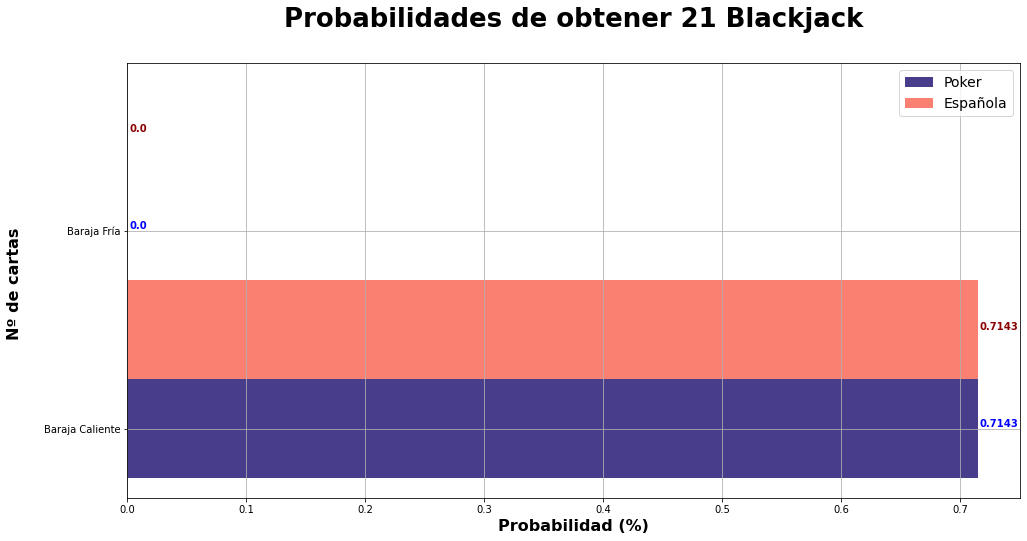

In [72]:
# Importando librerías necesarias para graficar

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

li = []
liE = []
barwidth = 0.5
# Creamos un arreglo para las etiquetas en y
va = ["Baraja Caliente","Baraja Fría"]
# Guardamos en un arreglo las probabilidades obtenidas
probabilidades = [prob_hot+prot_hotC2, prob_cold]
# Limito los decimales a 4 dígitos 
for i in probabilidades:
  x = (round(i, 4))
  li.append(x)
# Española
probabilidadesE = [prob_hot+prot_hotC2, prob_coldE]
for i in probabilidadesE:
  x1 = (round(i, 4))
  liE.append(x1)
# Obtenemos una lista con las posiciones de cada carta
y_pos = np.arange(len(probabilidades))
y_posE = [x + .5 for x in y_pos]

plt.figure(figsize = (16,8))
# Creamos la grafica pasando los valores en el eje X, Y, donde X = probabilidad y Y = nº de cartas
poker = plt.barh(y_pos, li, height = 0.5, align='center', color = 'darkslateblue', label = "Poker")
espanola = plt.barh(y_posE, liE, height = 0.5, align='center', color = 'salmon', label = "Española")
# Añadimos las etiquetas de nombres
plt.yticks(y_pos, va)
# Aññadimos anotaciones a las barras
for i, v in enumerate(li):
  plt.text(v + .002, i + .01, str(v), color='blue', fontweight='bold')
for j, w in enumerate(liE):
  plt.text(w + .002, j + .5, str(w), color='darkred', fontweight='bold')
# Etiquetas ejes
plt.xlabel('Probabilidad (%)', fontsize = 16, fontweight ='bold')
plt.ylabel('Nº de cartas \n', fontsize = 16, fontweight ='bold')
plt.legend(fontsize = 14)
plt.grid(True)
# Y una etiqueta superior
plt.title('Probabilidades de obtener 21 Blackjack\n', fontsize = 26, fontweight ='bold')
plt.show()

## **Estimando la cantidad promedio de dinero cuando Ben juega 21 BlackJack, con una baraja de Poker y/o con una baraja Española.**

> *Ben juega en las Vegas todos los fines de semana (viernes, sábado y domingo) durante 10 horas diarias. Cada juego dura 3 minutos.

> Para cada juego hay 2 posibilidades:

> 1.   En su mano [7,7,5] y queda una baraja caliente. Apuesta \$ 1 000.
2.   No tiene cartas en la mano. Hay una baraja completa. Apuesta \$ 10.



In [160]:
 # Mano de Ben [7,7,5] y queda una baraja caliente. Apuesta $ 1 000.
import numpy
#------------------BARAJA EN MANO---------------
mano = [7,7,5]
#--------BARAJA CALIENTE AMBAS BARAJAS----------
# 4 cartas de 1 y 4 cartas de 2
hot_deck=[1,1,1,1,2,2,2,2]
a = 0
b = 0
t = 10000
apuesta = 1000
probabilidadesE = [prob_2_cardsE, prob_3_cardsE, prob_4_cardsE, prob_5_cardsE, prob_6_cardsE, prob_7_cardsE, prob_8_cardsE,prob_9_cardsE,prob_10_cardsE,prob_11_cardsE]
probabilidades = [prob_2_cards, prob_3_cards, prob_4_cards, prob_5_cards, prob_6_cards, prob_7_cards, prob_8_cards,prob_9_cards,prob_10_cards,prob_11_cards]
probak=((sum(probabilidades)/len(probabilidades)))

probaE=(sum(probabilidadesE)/len(probabilidadesE))
#for l in mano:
  # Se suma la lista "mano"
  
#print(s)
g1=0
g2=0
p1=0
p2=0

eg1=0
eg2=0
ep1=0
ep2=0
# Simulaciones
for j in range(0,1):
  for i in range (0, 600):
    case=(numpy.random.choice([0, 1], size = 1, p=[(9/10),(1/10)])[0])
    if (case==1):
      s = 19
      # Selecciona una carta de baraja caliente 
      #n1 = hot_deck[random.randrange(0, 8)]
      n1 = choice(hot_deck)
      ## Baraja caliente
      if (s + n1) == 21:
        g1 += 1
      elif ((s + n1)<21):
        s=s+n1
        n2=choice(hot_deck)
        if ((s+n2)==21):
          g1+=1
        else:
          p1+=1 
      else:
        p1+=1  
    if (case==0):
      if ((numpy.random.choice([0, 1], size = 1, p=[0.84,0.16])[0])==1):
        g2+=1
      else:
        p2+=1

for j in range(0,1):
  for i in range (0, 600):
    case=(numpy.random.choice([0, 1], size = 1, p=[(9/10),(1/10)])[0])
    if (case==1):
      s = 19
      # Selecciona una carta de baraja caliente 
      #n1 = hot_deck[random.randrange(0, 8)]
      n1 = choice(hot_deck)
      ## Baraja caliente
      if (s + n1) == 21:
        eg1 += 1
      elif ((s + n1)<21):
        s=s+n1
        n2=choice(hot_deck)
        if ((s+n2)==21):
          eg1+=1
        else:
          ep1+=1 
      else:
        ep1+=1  
    if (case==0):
      if ((numpy.random.choice([0, 1], size = 1, p=[0.85,0.15])[0])==1):
        eg2+=1
      else:
        ep2+=1

# Son 600 juegos por fin de semana
valor = ((g1*1000*2)+(-p1*1000)+(g2*10*2)+(-p2*10))
valore = ((eg1*1000*2)+(-ep1*1000)+(eg2*10*2)+(-ep2*10))

print("Ben gana un promedio de: $ {:,.2f}".format(valor).replace(",", "@").replace(".", ",").replace("@", "."), "con una mano de [7,7,5] y una baraja de poker caliente.")
print("Ben gana un promedio de: $ {:,.2f}".format(valore).replace(",", "@").replace(".", ",").replace("@", "."), "con una mano de [7,7,5] y una baraja española caliente.")

Ben gana un promedio de: $ 72.180,00 con una mano de [7,7,5] y una baraja de poker caliente.
Ben gana un promedio de: $ 69.960,00 con una mano de [7,7,5] y una baraja española caliente.
